In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"./dataset/stockData/car/기아/기아_s.xlsx")

In [3]:
df

,날짜,시가,고가,저가,종가,전일비,등락률,거래량,금액(백만),신용비,...,외국계,프로그램,외인비,체결강도,외인보유,외인비중,외인순매수,기관순매수,개인순매수,신용잔고율
0,20000121,-6600,7050,-6600,7000,240,3.55,486810,3370,0.00,...,0,0,0.00,NaN,0.00,0.00,0,0,0,0.00
1,20000124,-6700,-6860,-6700,-6800,-200,-2.86,1062230,7274,0.00,...,0,0,0.00,NaN,0.00,0.00,0,0,0,0.00
2,20000125,6800,6800,-6650,-6650,-150,-2.21,377730,2524,0.00,...,0,0,0.00,NaN,0.00,0.00,0,0,0,0.00
3,20000126,6800,6800,-6550,-6600,-50,-0.75,340790,2266,0.00,...,0,0,0.00,NaN,0.00,0.00,0,0,0,0.00
4,20000127,6800,7000,6800,7000,400,6.06,473890,3266,0.00,...,0,0,0.00,NaN,0.00,0.00,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,20211129,-78600,-80400,-78200,-79200,-1400,-1.74,1758416,139561,0.42,...,--37969,--21862,34.99,NaN,34.99,34.99,--374653,+7431,+22025,0.42
5396,20211130,80500,80900,-77600,-77800,-1400,-1.77,2158288,169731,0.42,...,--14016,--19329,34.98,NaN,34.98,34.98,--59017,--12183,+28812,0.42
5397,20211201,79000,81500,78600,81200,3400,4.37,2028485,162749,0.42,...,+15445,+5418,35.04,NaN,35.04,35.04,+263843,+23109,--37140,0.42
5398,20211202,-80200,81900,-79500,81600,400,0.49,1330373,107997,0.42,...,+10209,+15259,35.07,NaN,35.07,35.07,+94824,+6539,--16438,0.42


# Pre-processing

#1 NAN value

In [4]:
df.isna().sum()

날짜           0
시가           0
고가           0
저가           0
종가           0
전일비          0
등락률          0
거래량          0
금액(백만)       0
신용비          0
개인           0
기관           0
외인수량         0
외국계          0
프로그램         0
외인비          0
체결강도      5400
외인보유         0
외인비중         0
외인순매수        0
기관순매수        0
개인순매수        0
신용잔고율        0
dtype: int64

In [5]:
df_drop_na = df.drop(["체결강도", "외인수량", "외인비", "외인보유", "외인비중", "외인순매수"], axis=1)

#2 type 

In [6]:
df_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      5400 non-null   int64  
 1   시가      5400 non-null   int64  
 2   고가      5400 non-null   int64  
 3   저가      5400 non-null   int64  
 4   종가      5400 non-null   int64  
 5   전일비     5400 non-null   int64  
 6   등락률     5400 non-null   float64
 7   거래량     5400 non-null   int64  
 8   금액(백만)  5400 non-null   int64  
 9   신용비     5400 non-null   float64
 10  개인      5400 non-null   object 
 11  기관      5400 non-null   object 
 12  외국계     5400 non-null   object 
 13  프로그램    5400 non-null   object 
 14  기관순매수   5400 non-null   object 
 15  개인순매수   5400 non-null   object 
 16  신용잔고율   5400 non-null   float64
dtypes: float64(3), int64(8), object(6)
memory usage: 717.3+ KB


In [7]:
d = df_drop_na.dtypes
string_cols = d[d == "object"].index.tolist()
print(string_cols)

['개인', '기관', '외국계', '프로그램', '기관순매수', '개인순매수']


In [8]:
df_drop_na[string_cols]

,개인,기관,외국계,프로그램,기관순매수,개인순매수
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
5395,+22025,+7431,--37969,--21862,+7431,+22025
5396,+28812,--12183,--14016,--19329,--12183,+28812
5397,--37140,+23109,+15445,+5418,+23109,--37140
5398,--16438,+6539,+10209,+15259,+6539,--16438


In [9]:
df_drop_na[string_cols] = df_drop_na[string_cols].replace('^--|\+-(.*)', r'-\1', regex=True)
df_drop_na[string_cols] = df_drop_na[string_cols].apply(pd.to_numeric)

#3 correlation

In [10]:
df_drop_na.set_index("날짜", drop=True, append=True, inplace=True)

D:\IDE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\IDE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


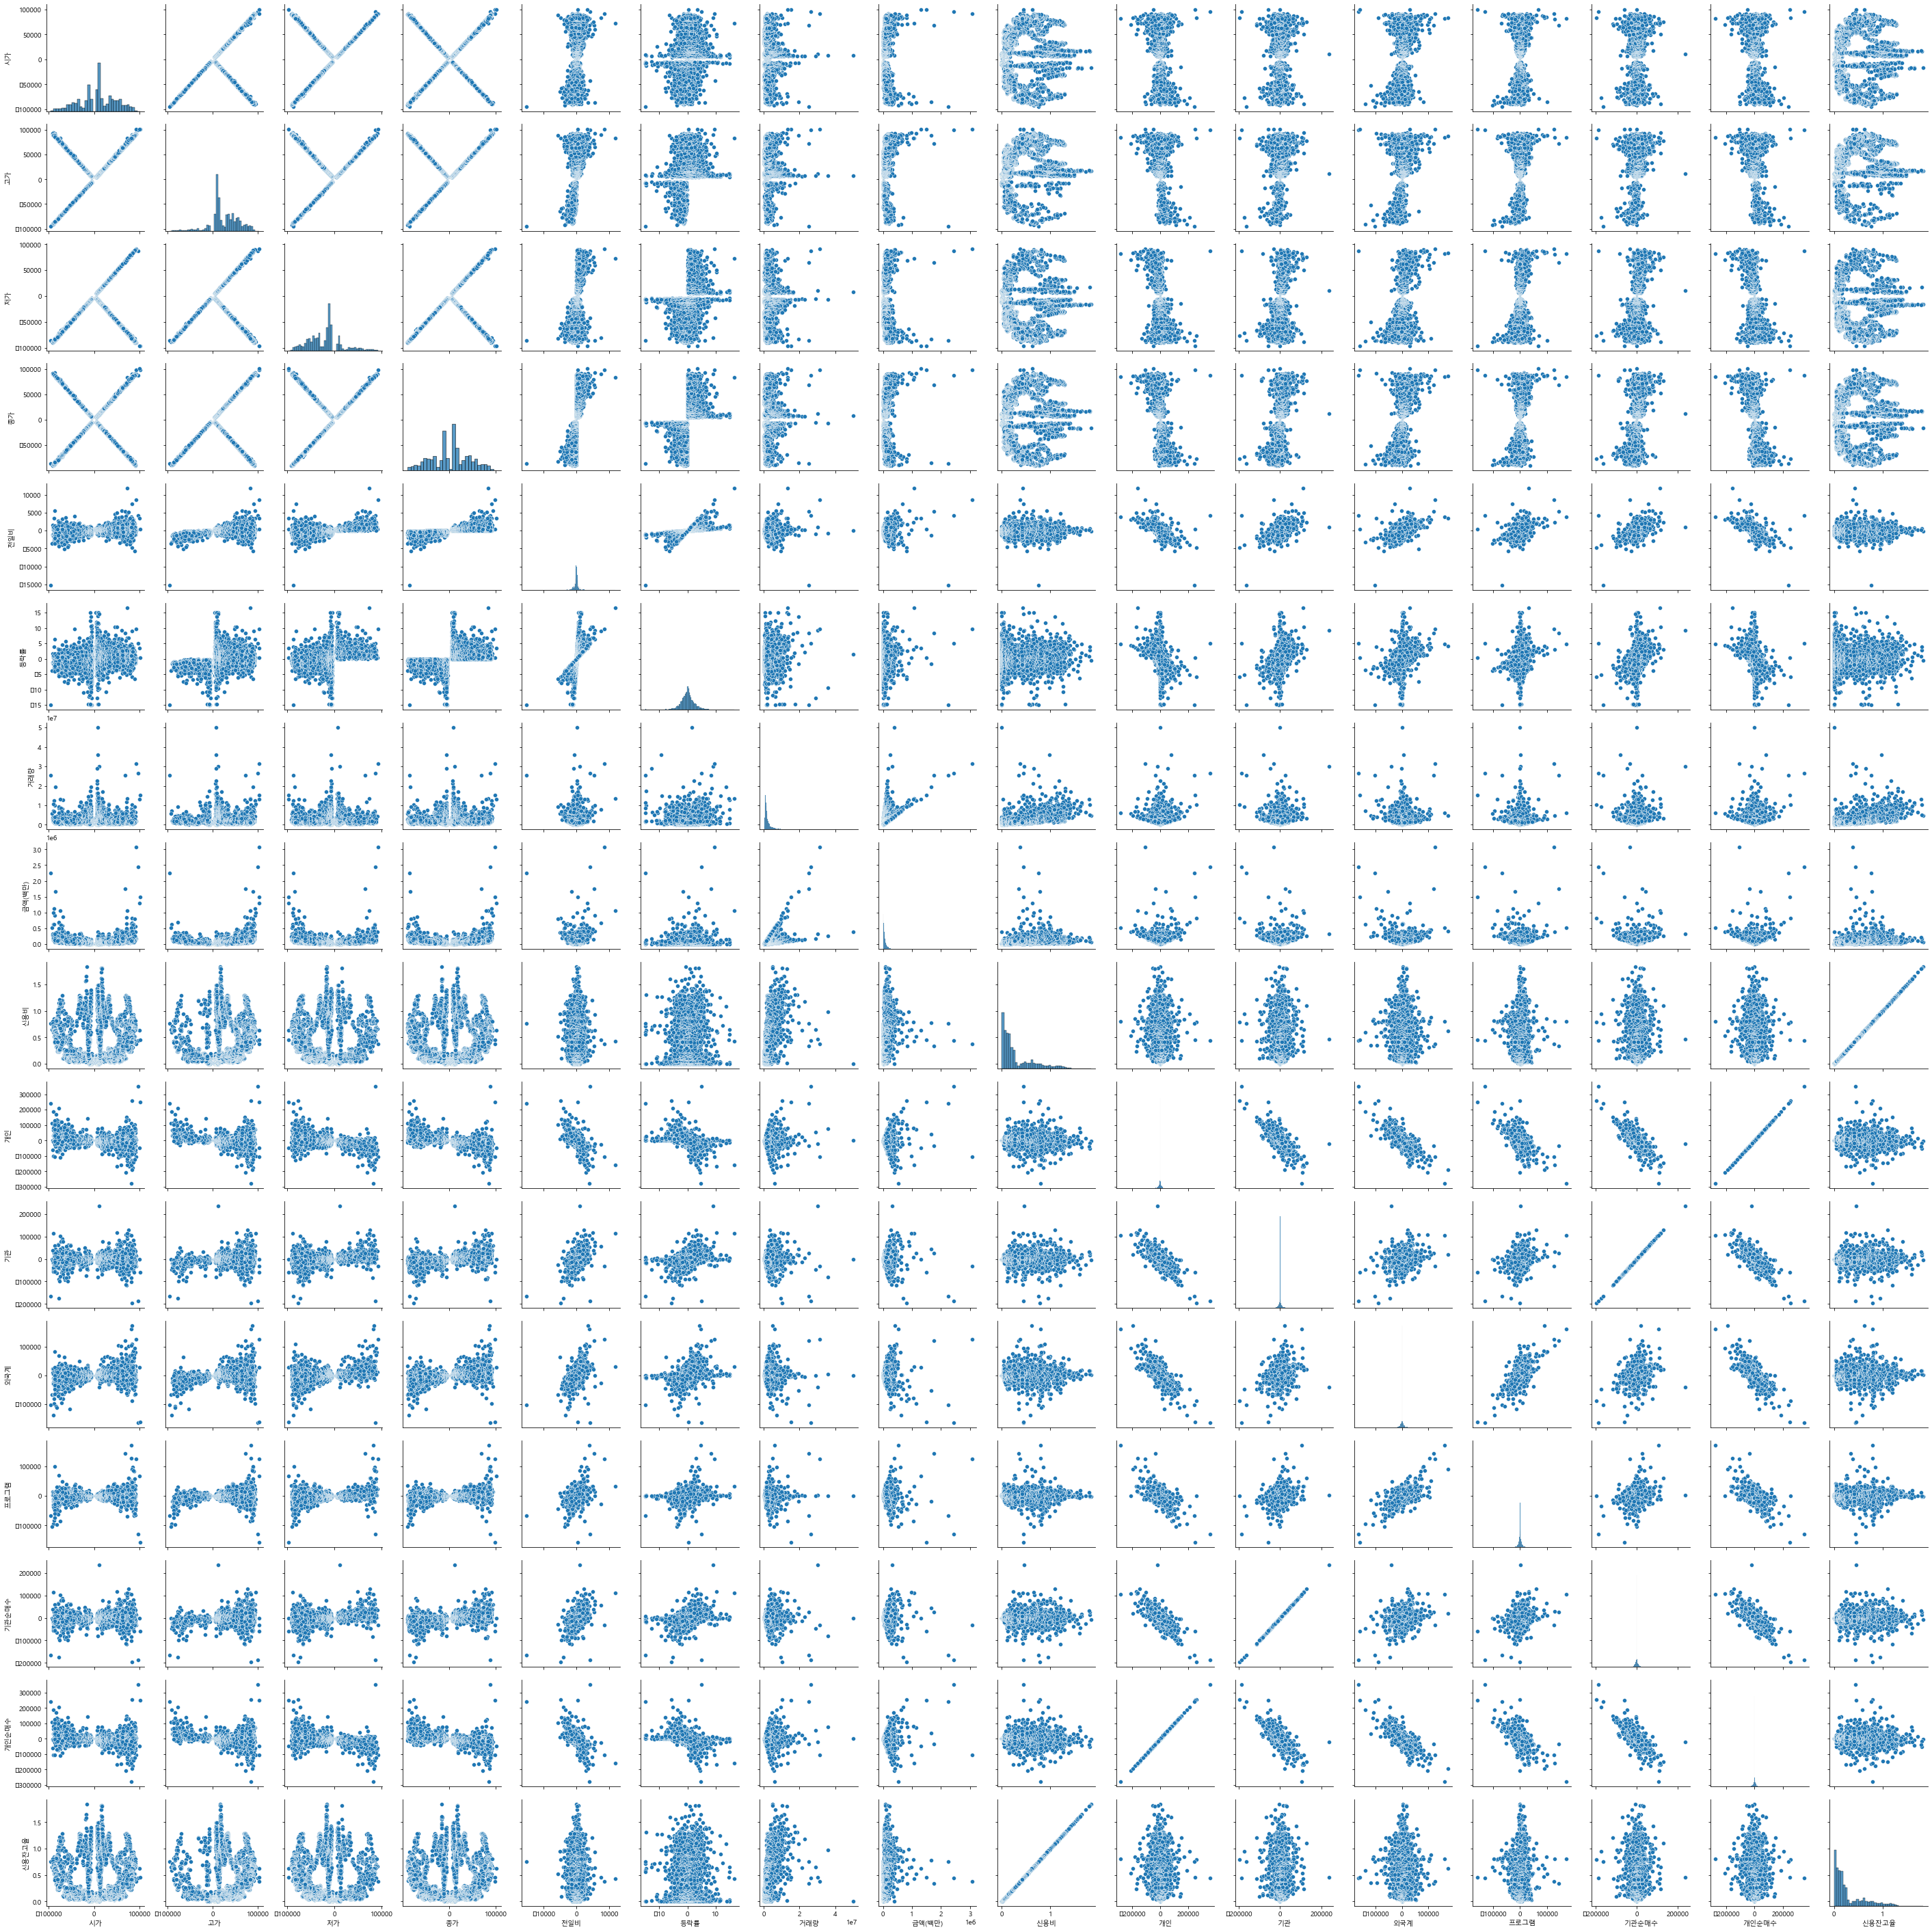

In [11]:
plt.rc('font', family='Malgun Gothic')
sns.pairplot(data=df_drop_na)
plt.show()

In [12]:
df_drop_price = df_drop_na.drop(["시가", "고가", "저가", "종가", "전일비", "신용비", "개인", "기관"], axis=1)

In [13]:
df_drop_price.columns

Index(['등락률', '거래량', '금액(백만)', '외국계', '프로그램', '기관순매수', '개인순매수', '신용잔고율'], dtype='object')

D:\IDE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\IDE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


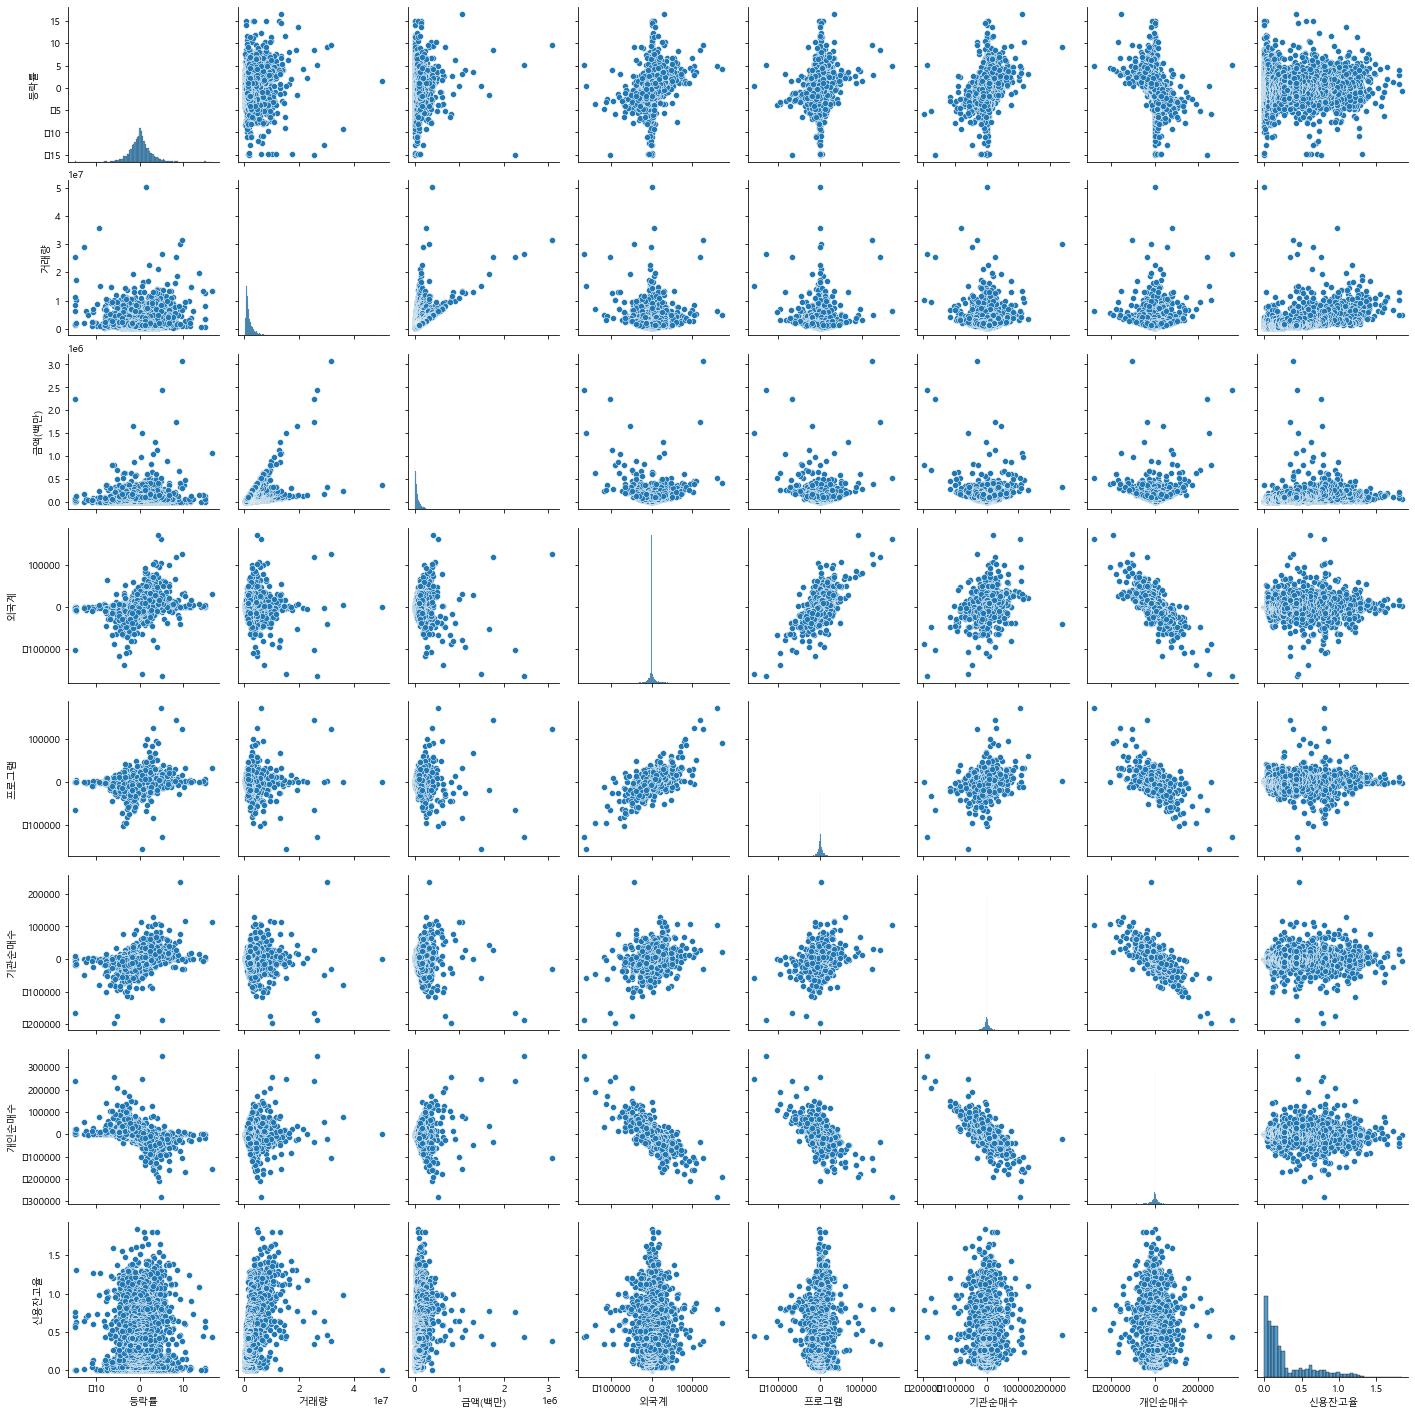

In [14]:
sns.pairplot(data=df_drop_price)
plt.show()

#4 scaling

In [15]:
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim

In [19]:
device = torch.device('cuda: 0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')

cpu is available


In [20]:
# rnn_type='LSTM'
# lstm = getattr(nn, rnn_type)(60, 20, 1, batch_first=True, dropout=0.2, bidirectional=1)

class RNNmodel(nn.Module):
    def __init__(self, rnn_type, input_size, hidden_size, num_layers, bidirectional=False):
        super(RNNmodel, self).__init__()
        
        self.rnn_type = rnn_type
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_direction = int(bidirectional) + 1
        
        self.rnn = getattr(nn, rnn_type)(input_size, hidden_size, num_layers, dropout=0, batch_first=True, bidirectional=bidirectional)


    def forward(self, input):
        # input shape: batch, seq, dim
        output = input
        rnn_output, _ = self.rnn(output)
        return rnn_output

In [24]:
def modeling(rnn_type, df_train_scaled):
    criterion = nn.MSELoss()
    
#     model = SingleRNN(rnn_type=rnn_type, input_size=1, hidden_size=14, num_layers=1)
    model = RNNmodel(rnn_tpye=rnn_type, input_size=7,
                       hidden_size=14,
                       sequence_length=sequence_length,
                       num_layers=num_layers,
                       device=device).to(device)
    
    lr = 1e-3
    num_epochs = 200
#     optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(num_epochs):
        running_loss = 0.0

        seq, target = df_train_scaled[:, 1:], df_train_scaled[:, 0] # 배치 데이터.
        
        out = model(seq)   # 모델에 넣고,
        loss = criterion(out, target) # output 가지고 loss 구하고,

        optimizer.zero_grad() # 
        loss.backward() # loss가 최소가 되게하는 
        optimizer.step() # 가중치 업데이트 해주고,
        running_loss += loss.item() # 한 배치의 loss 더해주고,

        if epoch % 100 == 0:
            print('[epoch: %d] loss: %.4f'%(epoch, running_loss))
            
    return model
    

In [36]:
ss = StandardScaler()

train_bound = df_drop_na.shape[0] * 0.8

# for i in range(int(train_bound), df_drop_na.shape[0], 1):
#     df_train = df_drop_price.iloc[:i, :]
#     df_test = df_drop_price.iloc[i, :].values.reshape(1,-1)

#     df_train_scaled = ss.fit_transform(df_train)
#     df_test_scaled = ss.transform(df_test)
    
#     sns.pairplot(data=pd.DataFrame(df_train_scaled, columns=df_drop_price.columns))
#     plt.show()
#     model = modeling('RNN', df_train_scaled)

# 3월 31일, 6월 30일, 9월 30일, 12월 31일
bound_list = [0, 67, 62, 65, 68]
count = 0
arr = []
for i in range(0, len(bound_list) - 1):
    count += bound_list[i]
    
    s = count
    e = s + bound_list[i+1]
    
    temp = df_drop_price.iloc[s:e, :].values
    temp = temp.reshape((-1, 8))
    arr.append(temp.tolist())
    
#     arr = np.empty((0, 8), float)
#     arr = np.append(arr, temp, axis=1)
t = torch.tensor(arr)
print(t)



ValueError: expected sequence of length 90 at dim 1 (got 87)

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

In [8]:
class myDataset(Dataset):
    def __init__(self,  X, y, train_bound, transform=None, target_transform=None):
        self.transform = transform
        self.target_transform = target_transform
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X) - 1
    
    def __getitem__(self, idx):
        if self.transform:
            X_row = transform(X.iloc[X, :])
        if self.target_transform:
            y_row = transform(y.iloc[y, :])
        
        return X_row, y_row

In [57]:
import requests 
import datetime 
import pickle 

url = "https://open.krx.co.kr/contents/OPN/99/OPN99000001.jspx" 
years = [i for i in range(2014, 2022)] # 휴장일 검색 연도

def get_holidays(year):
    data = {"search_bas_yy": year,"gridTp": "KRX", "pagePath": "/contents/MKD/01/0110/01100305/MKD01100305.jsp", "code": 'VwN0qWxNxoQd3GptLiFi7VpQSV4Ewa+d2Su7DXPyhf9QzGrcwc/rwEcTS38k4e2df5Yx0Mfnbi2PWDHmer4lQzKMoOk5t9O8/DabZgelyz9UBc82a6GP7G4MABRDdIaJ7T+v79W6ON5hsRRGRUrUj69+eqY/BlbgIhBGzjGwqsT+CtNJN0ckkY/7efqYEaL7', 'pageFirstCall': 'Y'} 
    content_type = 'application/x-www-form-urlencoded; charset=UTF-8' 
    response = requests.post(url=url, data=data, headers={'Content-Type': content_type}) 
    resultJson = response.json() 
    # print(response.json()) 
    holidays = [x['calnd_dd_dy'] for x in resultJson['block1']] 
    return holidays

holiday_list = []
for year in years:
    holiday_list += get_holidays(year)

print(f'휴장일 수 : {len(holiday_list)}, 날짜 : {holiday_list}') 

# with open('marketHoliday.pickle', 'wb') as f:
#     pickle.dump(holidays, f) #입력


휴장일 수 : 120, 날짜 : ['2014-01-01', '2014-01-30', '2014-01-31', '2014-05-01', '2014-05-05', '2014-05-06', '2014-06-04', '2014-06-06', '2014-08-15', '2014-09-08', '2014-09-09', '2014-09-10', '2014-10-03', '2014-10-09', '2014-12-25', '2014-12-31', '2015-01-01', '2015-02-18', '2015-02-19', '2015-02-20', '2015-05-01', '2015-05-05', '2015-05-25', '2015-08-14', '2015-09-28', '2015-09-29', '2015-10-09', '2015-12-25', '2015-12-31', '2016-01-01', '2016-02-08', '2016-02-09', '2016-02-10', '2016-03-01', '2016-04-13', '2016-05-05', '2016-05-06', '2016-06-06', '2016-08-15', '2016-09-14', '2016-09-15', '2016-09-16', '2016-10-03', '2016-12-30', '2017-01-27', '2017-01-30', '2017-03-01', '2017-05-01', '2017-05-03', '2017-05-05', '2017-05-09', '2017-06-06', '2017-08-15', '2017-10-02', '2017-10-03', '2017-10-04', '2017-10-05', '2017-10-06', '2017-10-09', '2017-12-25', '2017-12-29', '2018-01-01', '2018-02-15', '2018-02-16', '2018-03-01', '2018-05-01', '2018-05-07', '2018-05-22', '2018-06-06', '2018-06-13', '

In [54]:
from datetime import timedelta, date

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2021,9,30)
end_dt = date(2021,12,31)
def get_week_day(start_dt, end_dt, holiday_list):
    weekends = [5,6]
    weekday_list = []
    for dt in daterange(start_dt, end_dt):
        if dt.weekday() not in weekends and dt.weekday() not in holiday_list:
            weekday_list.append(dt.strftime("%Y-%m-%d"))
    return weekday_list


67
